In [1]:
##question 1

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
data = pd.read_csv('kidney_disease.csv')
model = DecisionTreeClassifier()
X, y = data.drop(['ckd'],axis=1), data[['ckd']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

#model = DecisionTreeClassifier(criterion = 'ckd')
model.fit(X, y) # Train model
feature_names = list(X.columns)
y_predicted = model.predict(X_test) # Prediction
accuracy = accuracy_score(y_test, y_predicted)

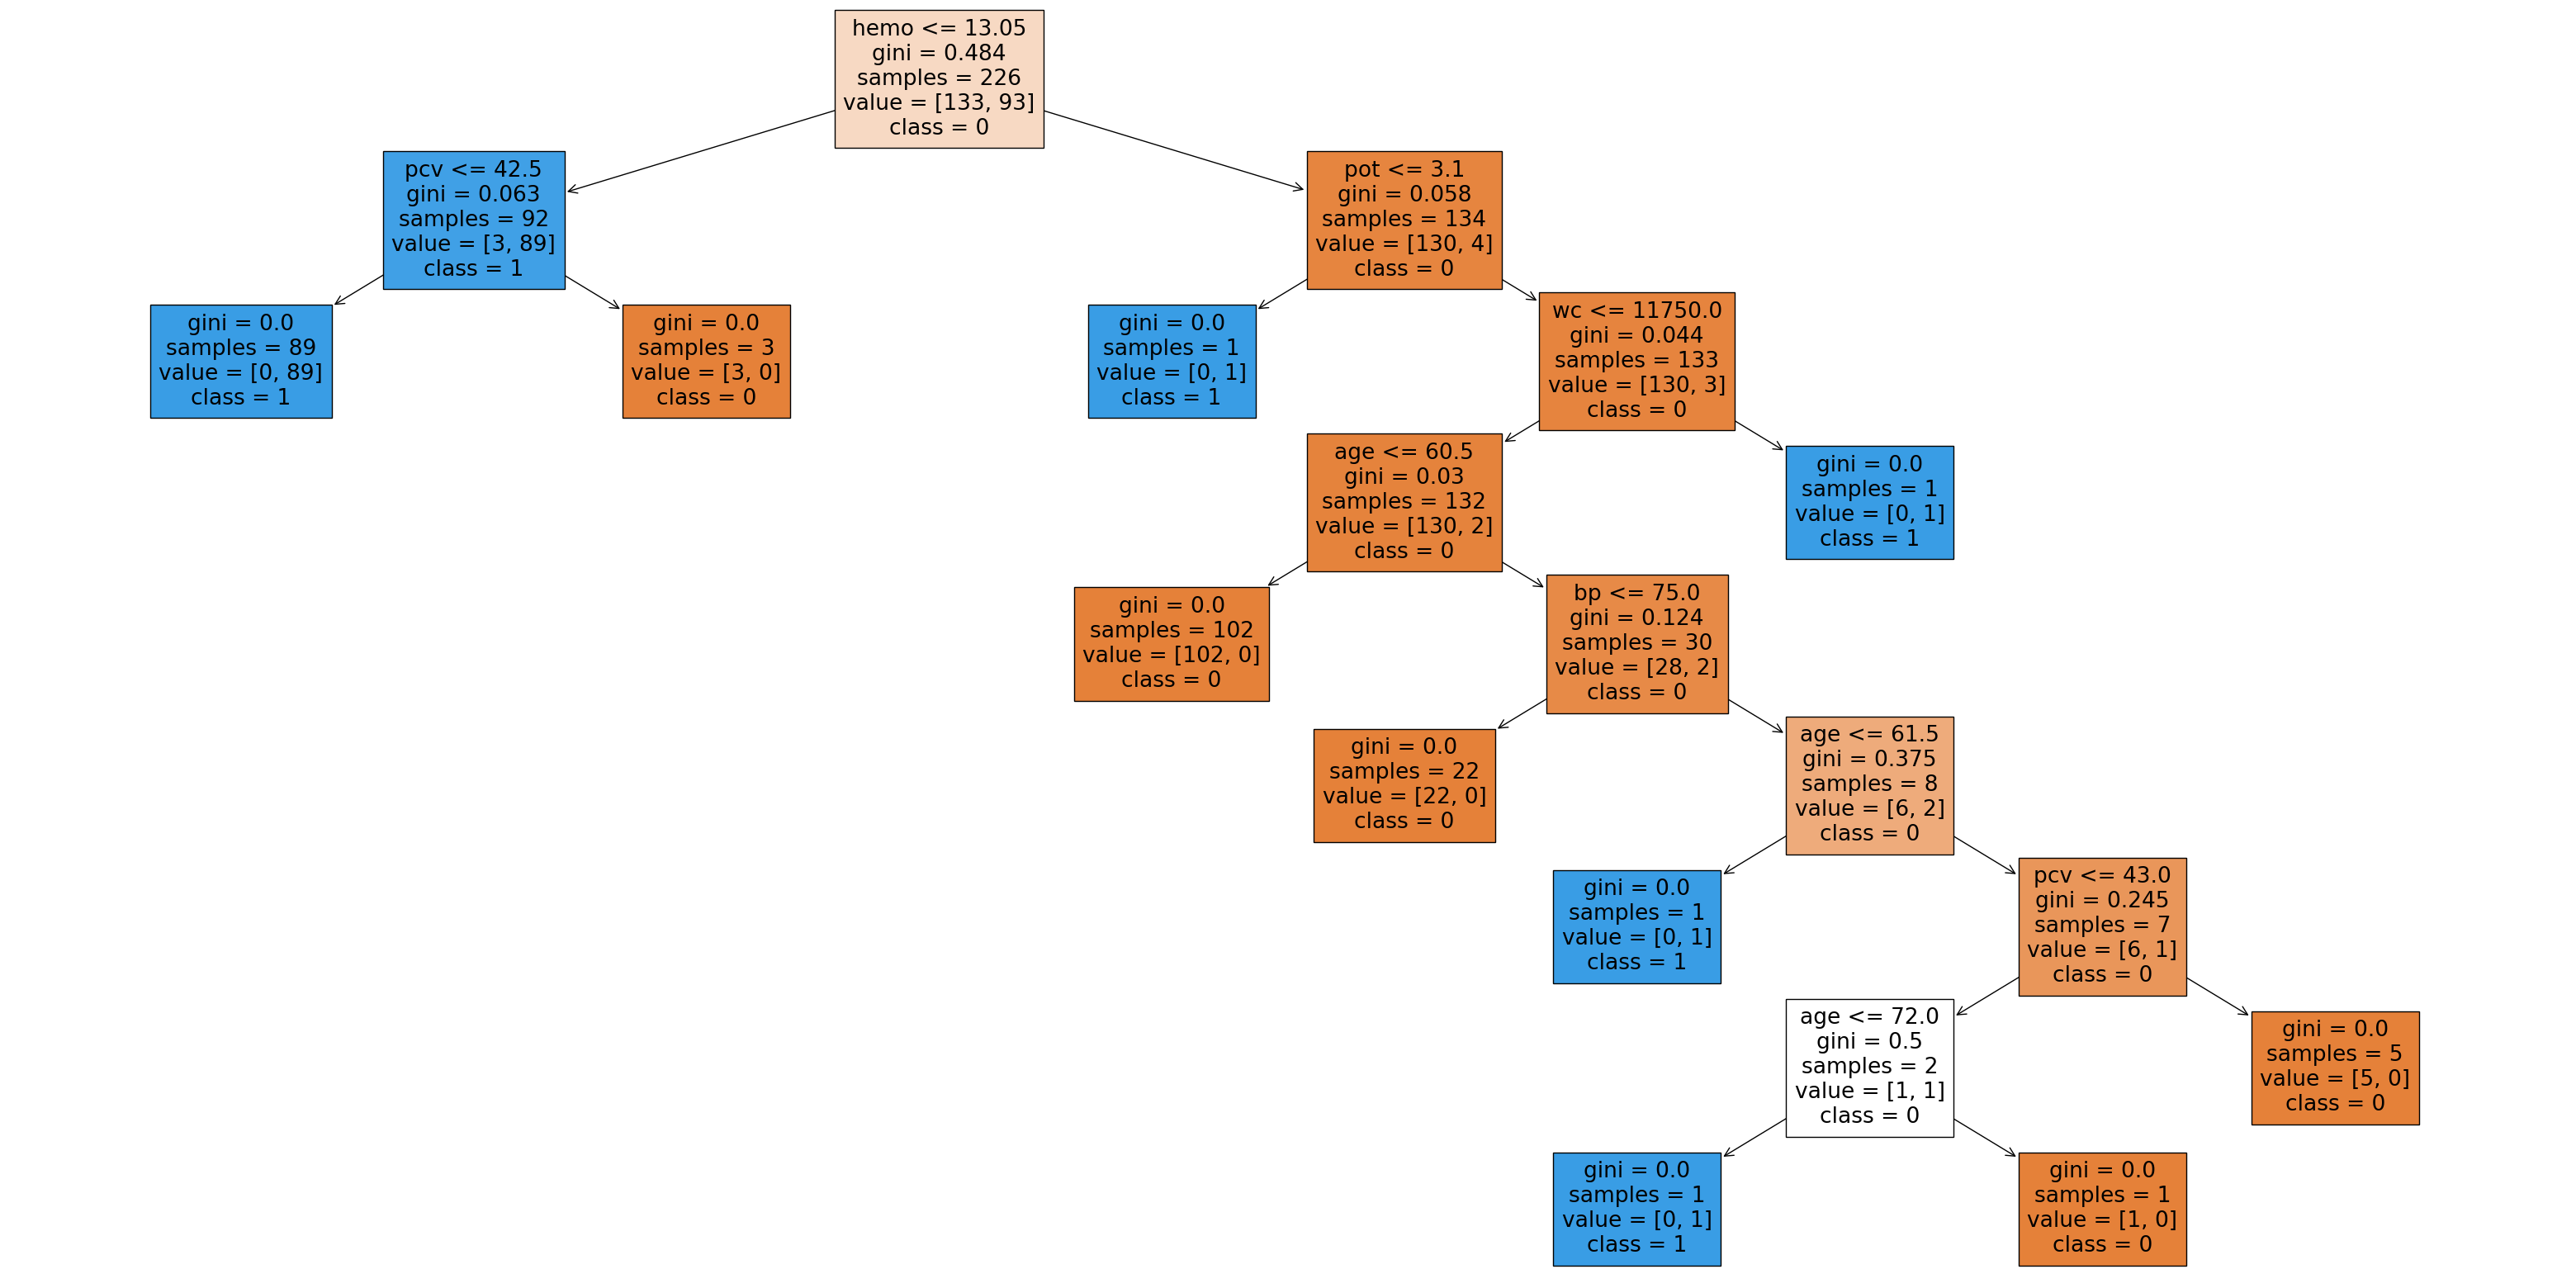

In [56]:
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=feature_names,class_names=['0','1'], filled=True)
plt.savefig('tree.pdf')

In [57]:
#Here , if hemo<=13.05 is true than:
#Person(A) and B are class=1, 
#if hemo<=13.05 is not  true than:
#Person(A) = class 0, Person(B) = class 1



In [58]:
##question 2


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [79]:
tf.random.set_seed(1)
model = Sequential()

In [80]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
scaler = MinMaxScaler()
y = y.reshape(-1,1)
y = scaler.fit_transform(y)

In [81]:
#with relu activation
model = Sequential()
input_layer=InputLayer(input_shape=(10)) #feature
model.add(input_layer)
hidden_layer = Dense(8) #one layer, 8 nodes  
model.add(hidden_layer)

output_layer  = Dense(1,activation='relu')
model.add(output_layer)

model.compile(loss='mean_absolute_error')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.7)
model.fit(X_train,y_train,epochs=10)




Epoch 1/10
5/5 [==============================] - 0s 13ms/step - loss: 0.3432
Epoch 2/10


2022-11-24 03:27:49.583855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.3188
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2936
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2705
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2514
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2363
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2236
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.2129
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2036
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1975


In [82]:
#without relu activation
model1 = Sequential()
input_layer=InputLayer(input_shape=(10)) #feature
model1.add(input_layer)
hidden_layer = Dense(8) #one layer, 8 nodes  
model1.add(hidden_layer)

output_layer  = Dense(1,activation=None)
model1.add(output_layer)

model1.compile(loss='mean_absolute_error')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.7)

model1.fit(X_train,y_train,epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 13ms/step - loss: 0.3741
Epoch 2/10
1/5 [=====>........................] - ETA: 0s - loss: 0.3058

2022-11-24 03:27:52.570466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.3334
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.3089
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2865
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2694
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2569
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2439
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2314
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.2215
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2123


In [65]:
#Here, if we use relu, than we have less loss in compare to without using  relu, that is with relu our loss is 0.19,
#while, whitout relu it is 0.21. So relu activation is appropriate for the output layer of the model. 

In [66]:
##question 4 

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
number_of_training_instances = X_train.shape[0] 
number_of_testing_instances = X_test.shape[0] # reshape dataset 
X_train = X_train.reshape((number_of_training_instances, 28*28)) 
X_test = X_test.reshape((number_of_testing_instances, 28*28))

In [68]:
tf.random.set_seed(1)
model = Sequential()

input_layer = InputLayer(input_shape=(28*28,))
model.add(input_layer)

hidden_layer = Dense(28*28/2)
model.add(hidden_layer)

output_layer = Dense(10,activation = 'softmax')
model.add(output_layer)

In [69]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [70]:
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [71]:
X_train.shape

(60000, 784)

In [72]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
   6/1875 [..............................] - ETA: 21s - loss: 286.5558 - accuracy: 0.3177 

2022-11-24 03:24:02.470900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 23.0434 - accuracy: 0.8406
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 4.8521 - accuracy: 0.8433
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 4.0116 - accuracy: 0.8508
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 3.7438 - accuracy: 0.8569
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 3.6817 - accuracy: 0.8607
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 3.6503 - accuracy: 0.8641
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 3.6569 - accuracy: 0.8633
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 3.6099 - accuracy: 0.8684
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 3.5369 - accuracy: 0.8670
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - l

In [76]:
y_pred = model.predict(X_test)
print(y_pred)

313/313 [==============================] - 1s 2ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  3.5552435e-29 4.0002099e-21]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.1828338e-13 ... 5.3533862e-23
  7.8362951e-13 1.7376124e-36]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  6.1723677e-29 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  2.4973245e-32 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [74]:
model.save('digits_model.h5')